In [2]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from statistics import mode

In [3]:
df_churndata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Contract Types

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

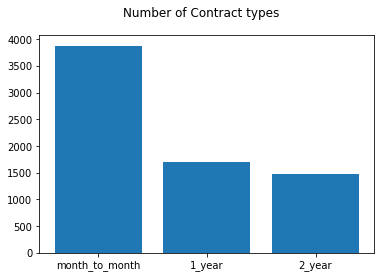

In [4]:
contract_month_to_month = (df_churndata['Contract'].value_counts())
x = ['month_to_month', '1_year', '2_year']
plt.bar(x, contract_month_to_month)
plt.suptitle("Number of Contract types")

contract_month_to_month

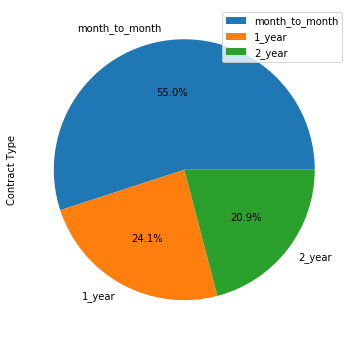

In [5]:
#Pie chart of Contract types

d = {'Contract Type': [3875, 1695, 1473]}
df_pie_contract_types = pd.DataFrame(data=d, index=['month_to_month','1_year','2_year'])
plot = df_pie_contract_types.plot.pie(y='Contract Type', autopct='%1.1f%%', figsize=(6, 6))

In [6]:
#I want to find out Churn data in each Contract type

churn_yes = df_churndata['Churn'] == 'Yes'
churn_yes_df = df_churndata[churn_yes]

In [7]:
m2m = churn_yes_df['Contract'] == 'Month-to-month'
churn_yes_df[m2m].Contract.value_counts()

Month-to-month    1655
Name: Contract, dtype: int64

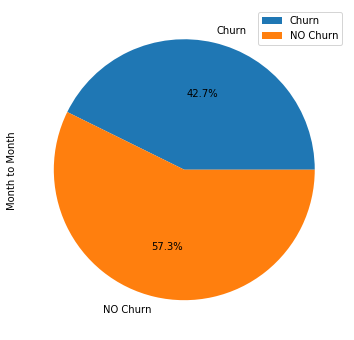

In [8]:
#Contract Pie chart month to month
d = {'Month to Month': [1655, 2220]}
df_pie_m2m = pd.DataFrame(data=d, index=['Churn','NO Churn'])
plot = df_pie_m2m.plot.pie(y='Month to Month', autopct='%1.1f%%', figsize=(6, 6))

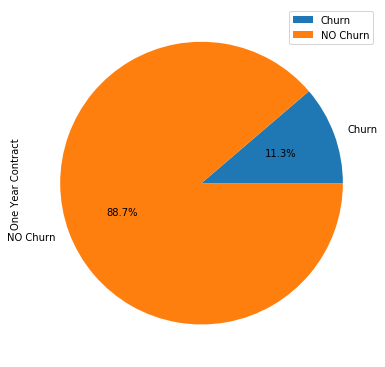

In [9]:
one_year = churn_yes_df['Contract'] == 'One year'
churn_yes_one_year = churn_yes_df[one_year]
# churn_yes_one_year.info()
#166 yes churn and 1473 total, meaning 1307 no churn
d = {'One Year Contract': [166, 1307]}
df_pie_1yr = pd.DataFrame(data=d, index=['Churn','NO Churn'])
plot = df_pie_1yr.plot.pie(y='One Year Contract', autopct='%1.1f%%', figsize=(6.5, 6.5))

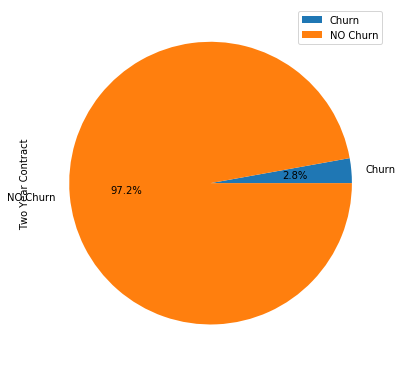

In [10]:
two_year = churn_yes_df['Contract'] == 'Two year'
churn_yes_two_year = churn_yes_df[two_year]
# churn_yes_two_year.info()
#48 yes churn entries, 1695 total, meaning 1647 no churns

d = {'Two Year Contract': [48, 1647]}
df_pie_2yr = pd.DataFrame(data=d, index=['Churn','NO Churn'])
plot = df_pie_2yr.plot.pie(y='Two Year Contract', autopct='%1.1f%%', figsize=(6.5, 6.5))

#### Based on above data, we can see that month-to-month contracts show the highest churn and longer contracts trend lower churn

### Tenure vs. Churn

Text(0.5, 0.98, 'Number Churn vs. Tenure range')

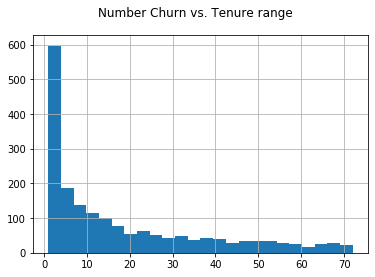

In [11]:
#NOW WE LOOK AT TENURE VS CHURN
#split the tenure into yes churn vs no churn
#See how big each dataframe is
#Make a histogram plot of each dataframe 
#get averages and all that stuff for tenure months
#make an observation of the data

churn_yes_df['tenure'].hist(bins = 24)
churn_yes_df['tenure'].shape[0]
plt.suptitle("Number Churn vs. Tenure range")

In [12]:
churn_yes_df['tenure'].value_counts(bins=24)
#We see a significant amount between 1-4 months

(0.928, 3.958]      597
(3.958, 6.917]      187
(6.917, 9.875]      139
(9.875, 12.833]     114
(12.833, 15.792]     99
(15.792, 18.75]      78
(21.708, 24.667]     63
(18.75, 21.708]      54
(24.667, 27.625]     51
(30.583, 33.542]     49
(27.625, 30.583]     43
(36.5, 39.458]       42
(39.458, 42.417]     41
(33.542, 36.5]       37
(45.375, 48.333]     35
(51.292, 54.25]      35
(48.333, 51.292]     33
(66.083, 69.042]     27
(42.417, 45.375]     27
(54.25, 57.208]      27
(63.125, 66.083]     26
(57.208, 60.167]     25
(69.042, 72.0]       23
(60.167, 63.125]     17
Name: tenure, dtype: int64

Text(0.5, 0.98, 'Churn number in 18 month ranges')

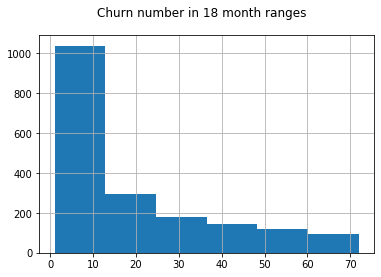

In [13]:
churn_yes_df['tenure'].hist(bins = 6)
#We see significant churns in the first 18 months with a major portion between 1-4 months
plt.suptitle("Churn number in 18 month ranges")

In [14]:
#First 12 months = 1037 total, with 597 churn in 1-4 months!!!
## 49.17% of the churn in the first 18 months happens in the first 4 months!!!!!!!!!!!!!
churn_yes_df['tenure'].value_counts(bins=6)

(0.928, 12.833]     1037
(12.833, 24.667]     294
(24.667, 36.5]       180
(36.5, 48.333]       145
(48.333, 60.167]     120
(60.167, 72.0]        93
Name: tenure, dtype: int64

In [15]:
#Let's see year by year
churn_yes_df['tenure'].value_counts(bins=6)

(0.928, 12.833]     1037
(12.833, 24.667]     294
(24.667, 36.5]       180
(36.5, 48.333]       145
(48.333, 60.167]     120
(60.167, 72.0]        93
Name: tenure, dtype: int64

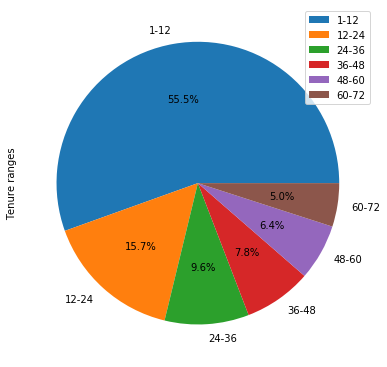

In [16]:
#I should move this up first in the presentation to show that there are significant amount of churns in the first year. Then dive deep into how much
p = churn_yes_df['tenure'].value_counts(bins=6).to_list()
d = {'Tenure ranges': p}
df_pie_tenures = pd.DataFrame(data=d, index=['1-12','12-24','24-36','36-48','48-60', '60-72'])
plot = df_pie_tenures.plot.pie(y='Tenure ranges', autopct='%1.1f%%', figsize=(6.5, 6.5))

#### We see that in the first 12 months of tenure, is where there is the most churn.

In [17]:
print('YES CHURN - Mean tenure is: ',   churn_yes_df.tenure.mean().round(2),   'months.')
print('YES CHURN - Median tenure is: ', churn_yes_df.tenure.median().round(2), 'months.')
print('YES CHURN - Mode tenure is: ',   churn_yes_df.tenure.mode()[0],   'month.')
tenure_1 = churn_yes_df.tenure == 1
tenure_1.value_counts()
print('YES CHURN - The number of contracts with tenure of 1 month is 380.')

YES CHURN - Mean tenure is:  17.98 months.
YES CHURN - Median tenure is:  10.0 months.
YES CHURN - Mode tenure is:  1 month.
YES CHURN - The number of contracts with tenure of 1 month is 380.


In [18]:
churn_yes_df['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

#### Analyzing tenure in no-churn

Text(0.5, 0.98, 'Analysis of No-Churn in tenure range')

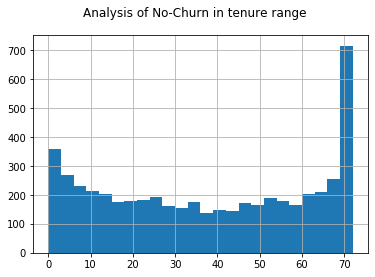

In [19]:
#Now we see NO Churn

churn_no = df_churndata['Churn'] == 'No'
churn_no_df = df_churndata[churn_no]
churn_no_df['tenure'].hist(bins=24)
churn_no_df['tenure'].shape[0]
plt.suptitle("Analysis of No-Churn in tenure range")

In [20]:
#Would ya look at that? No churn shows the higher number of long term contracts

print('NO CHURN - Mean tenure is: ',   churn_no_df.tenure.mean().round(2),   'months.')
print('NO CHURN - Median tenure is: ', churn_no_df.tenure.median().round(2), 'months.')
print('NO CHURN - Mode tenure is: ',   churn_no_df.tenure.mode()[0],   'months.')
tenure_1 = churn_no_df.tenure == 72
tenure_1.value_counts()
print('NO CHURN - The number of contracts with tenure of 72 months is 356.')

NO CHURN - Mean tenure is:  37.57 months.
NO CHURN - Median tenure is:  38.0 months.
NO CHURN - Mode tenure is:  72 months.
NO CHURN - The number of contracts with tenure of 72 months is 356.


In [21]:
churn_no_df['tenure'].value_counts(bins=6)

(60.0, 72.0]      1314
(-0.073, 12.0]    1149
(12.0, 24.0]       730
(48.0, 60.0]       712
(24.0, 36.0]       652
(36.0, 48.0]       617
Name: tenure, dtype: int64

In [22]:
churn_no_df['tenure'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

#### We see that mean for yes_churn is ~18 months and mean for no_churn is ~37.5 months almost double the amount.
#### To reduce our churn, we need to let go of these 1 month people.

### Monthly Charges

In [23]:
momo = churn_yes_df[(churn_yes_df['tenure'] == 1)]
momo.MonthlyCharges.describe()

count    380.000000
mean      58.197368
std       23.816448
min       18.850000
25%       43.787500
50%       69.375000
75%       75.512500
max      102.450000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0.98, 'Tenure of 1 month, Monthly charge range amongst Churned customers')

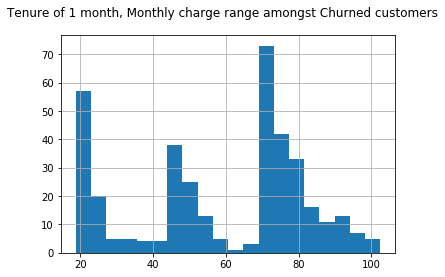

In [24]:
momo.MonthlyCharges.hist(bins=20)
plt.suptitle("Tenure of 1 month, Monthly charge range amongst Churned customers")

Text(0.5, 0.98, 'Monthly Charges amongst non-churned customers')

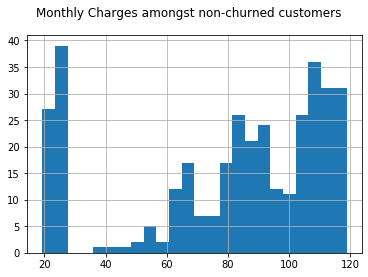

In [25]:
#Lets check no churn monthly charges
nomo = churn_no_df[(churn_no_df['tenure'] == 72)]
nomo.MonthlyCharges.hist(bins=24)
plt.suptitle("Monthly Charges amongst non-churned customers")

In [26]:
nomo.MonthlyCharges.describe()

count    356.000000
mean      80.423174
std       32.044927
min       19.300000
25%       64.800000
50%       88.700000
75%      108.225000
max      118.750000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0.98, 'Number Churned vs. Monthly Charges')

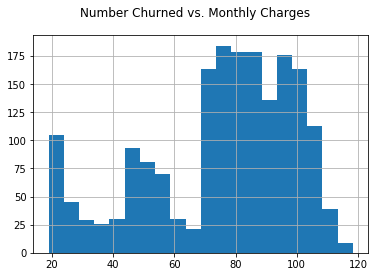

In [27]:
#Now lets just compare monthly charges vs churn
#We see that higher contract prices are in the higher churn percent
churn_yes_df.MonthlyCharges.hist(bins=20)
plt.suptitle("Number Churned vs. Monthly Charges")

In [28]:
churn_yes_df.MonthlyCharges.value_counts(bins=20)

(73.575, 78.55]      186
(83.525, 88.5]       178
(93.475, 98.45]      176
(78.55, 83.525]      176
(68.6, 73.575]       163
(98.45, 103.425]     163
(88.5, 93.475]       136
(103.425, 108.4]     114
(18.75, 23.825]      105
(43.725, 48.7]        94
(48.7, 53.675]        80
(53.675, 58.65]       70
(23.825, 28.8]        45
(108.4, 113.375]      38
(58.65, 63.625]       30
(38.75, 43.725]       30
(28.8, 33.775]        29
(33.775, 38.75]       26
(63.625, 68.6]        21
(113.375, 118.35]      9
Name: MonthlyCharges, dtype: int64

In [29]:
churn_yes_df.MonthlyCharges.describe()

#We see here that higher mean price in the monthly charges that churned.

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Text(0.5, 0.98, 'Number NOT-Churned vs Monthly charges')

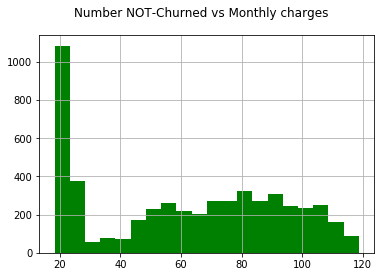

In [30]:
churn_no_df.MonthlyCharges.hist(bins=20, color='green')
plt.suptitle("Number NOT-Churned vs Monthly charges")

In [31]:
#We see here that for the no churn category, that there is s significant amount of low contract prices which will have low churn
churn_no_df.MonthlyCharges.value_counts(bins=20)

(18.148999999999997, 23.275]    1083
(23.275, 28.3]                   375
(78.55, 83.575]                  325
(88.6, 93.625]                   305
(83.575, 88.6]                   273
(73.525, 78.55]                  272
(68.5, 73.525]                   272
(53.425, 58.45]                  261
(103.675, 108.7]                 249
(93.625, 98.65]                  248
(98.65, 103.675]                 233
(48.4, 53.425]                   227
(58.45, 63.475]                  216
(63.475, 68.5]                   204
(43.375, 48.4]                   173
(108.7, 113.725]                 163
(113.725, 118.75]                 88
(33.325, 38.35]                   77
(38.35, 43.375]                   73
(28.3, 33.325]                    57
Name: MonthlyCharges, dtype: int64

In [32]:
#so far, we see that we avoid month to month contracts, we focus on a contract price of $18-23
churn_no_df.MonthlyCharges.describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

### TotalCharges

In [33]:
churn_no_df.TotalCharges.describe()

count     5174
unique    4966
top           
freq        11
Name: TotalCharges, dtype: object

In [34]:
churn_yes_df.TotalCharges.describe()

count     1869
unique    1732
top       20.2
freq         6
Name: TotalCharges, dtype: object

In [35]:
#Quick fix of the TotalCharges column to change it to float again

pd.set_option('mode.chained_assignment', None)
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#Churn_no_df
listblankindices = churn_no_df[(churn_no_df['TotalCharges'] == ' ')].index
churn_no_df.drop(listblankindices, inplace=True)
churn_no_df.reset_index(drop=True, inplace=True)
churn_no_df['TotalCharges'] = churn_no_df['TotalCharges'].astype(float)

#Churn_yes_df
listblankindices = churn_yes_df[(churn_yes_df['TotalCharges'] == ' ')].index
churn_yes_df.drop(listblankindices, inplace=True)
churn_yes_df.reset_index(drop=True, inplace=True)
churn_yes_df['TotalCharges'] = churn_yes_df['TotalCharges'].astype(float)

Text(0.5, 0.98, 'NO-Churn Total Charges')

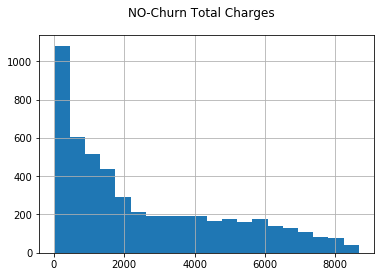

In [36]:
churn_no_df.TotalCharges.hist(bins=20)
plt.suptitle("NO-Churn Total Charges")

Text(0.5, 0.98, 'Number churned vs TotalCharges')

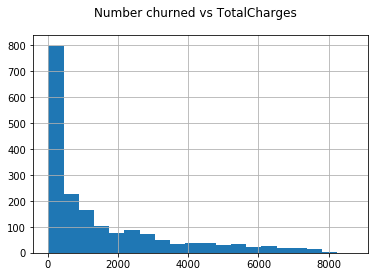

In [37]:
churn_yes_df.TotalCharges.hist(bins=20)
plt.suptitle("Number churned vs TotalCharges")

In [38]:
churn_yes_df.TotalCharges.value_counts(bins=20)

(10.183, 452.148]       799
(452.148, 885.445]      225
(885.445, 1318.742]     167
(1318.742, 1752.04]     104
(2185.337, 2618.635]     89
(1752.04, 2185.337]      77
(2618.635, 3051.932]     74
(3051.932, 3485.23]      51
(3918.527, 4351.825]     39
(4351.825, 4785.122]     37
(5218.42, 5651.718]      35
(3485.23, 3918.527]      34
(4785.122, 5218.42]      32
(6085.015, 6518.312]     26
(5651.718, 6085.015]     23
(6518.312, 6951.61]      20
(6951.61, 7384.907]      17
(7384.907, 7818.205]     15
(7818.205, 8251.502]      4
(8251.502, 8684.8]        1
Name: TotalCharges, dtype: int64

#### We see here total churn reflects the high number of early month to month churners

### Internet Service

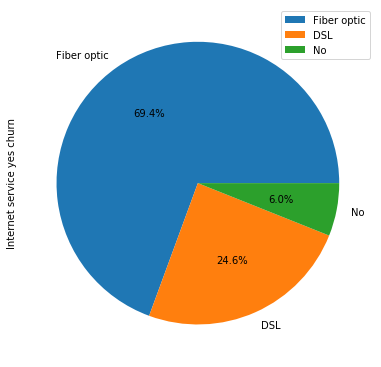

In [39]:
d = {'Internet service yes churn': [1297, 459, 113]}
df_Int_serv = pd.DataFrame(data=d, index=['Fiber optic','DSL', 'No'])
plot = df_Int_serv.plot.pie(y='Internet service yes churn', autopct='%1.1f%%', figsize=(6.5, 6.5))

In [40]:
churn_no_df.InternetService.value_counts()

DSL            1957
Fiber optic    1799
No             1407
Name: InternetService, dtype: int64

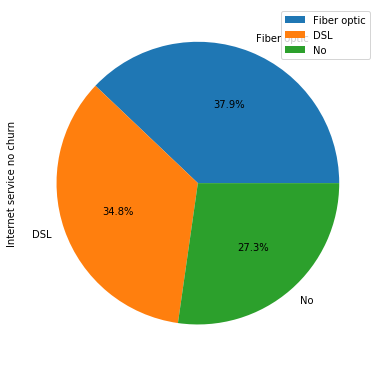

In [41]:
d = {'Internet service no churn': [1957, 1799, 1407]}
df_Int_serv1 = pd.DataFrame(data=d, index=['Fiber optic','DSL', 'No'])
plot = df_Int_serv1.plot.pie(y='Internet service no churn', autopct='%1.1f%%', figsize=(6.5, 6.5))

#### Recommendations based on the internet service type?
- Figure out if maybe a service provider type can be a reason for churn. Maybe the service provider is slower than the other. Location data and the major provider in the area
- Future work: need more data! - who/what/where/when/why?
- Fiber optic customers are more prevalent in churned customers - reach out to them?
- Maybe for customer retention strategy, investigate your fiber optic lines maybe offer less as an option to retain the customer

### TechSupport

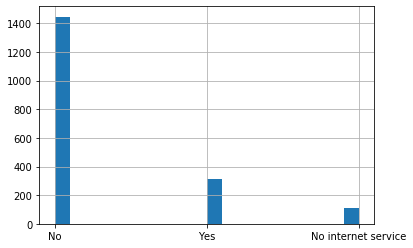

In [42]:
churn_yes_df.TechSupport.hist(bins=20)

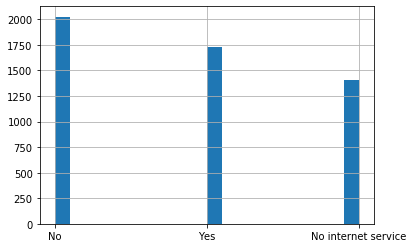

In [43]:
churn_no_df.TechSupport.hist(bins=20)

In [ ]:
# Recommendation: Offer better tech support for churned customers!

### OnlineSecurity

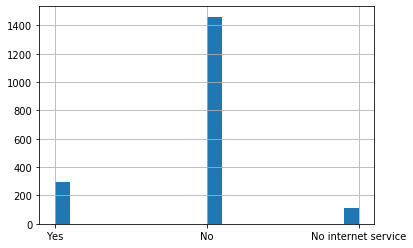

In [49]:
churn_yes_df.OnlineSecurity.hist(bins=20)

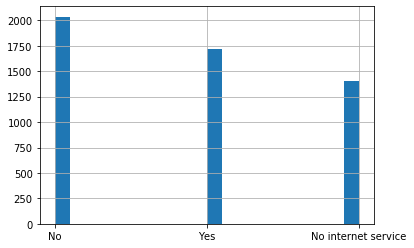

In [50]:
churn_no_df.OnlineSecurity.hist(bins=20)

In [51]:
# Recommendation: How about we offer online security to retain the churning customers?

# Recommendations

1. Improve retention strategy for month-to-month contracts. Either push the customer to go for longer plans or get rid of month-to-month altogether

2. Contact the fiber-optics service providers of churned customers in order to push new marketing/ad campaigns

3. Price tiers for month-to-months? Why not simplify instead? Offer better terms to begin with so it will be more painful for them to churn. Other competitors will have to compete with us.

4. Speaking of offering better terms, make the longer term contracts more enticing. Encourage longer term contracts with sweet deals to the customers that will churn.

5. Create a survery for churned customers to see what other facts are coming in to play outside of this data. We need more data!
6. Offer tech support if it means to save a churning customer.
7. Offer online security if it means to save the customer.